In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [50]:
data = pd.read_csv('dataset.csv')

In [51]:
data
# 年齢,性別(男:0女:1),過去の重病の有無,家族構成(人),孤独感(尺度0～3),運動の頻度(回/週),睡眠時間(h),地域,貯金(万円),今後の介護の必要性

,age,sex,had_sick,family,lonely,excersice,sleep,region,money,result
0,86,0,1,1,2,1,8,tokyo,1504,1
1,87,0,0,2,1,2,7,chiba,2681,1
2,77,1,0,2,1,2,6,saitama,2497,1
3,74,0,1,1,2,3,8,tokyo,1627,0
4,80,0,0,3,2,0,5,saitama,2120,0
...,...,...,...,...,...,...,...,...,...,...
295,84,0,0,2,1,4,7,chiba,2626,1
296,83,0,1,3,2,0,5,chiba,1287,0
297,97,0,0,1,2,5,8,saitama,1693,1
298,67,0,0,2,0,0,5,chiba,119,1


In [52]:
X = data[["age","sex","had_sick","family","lonely","excersice","sleep","region","money"]]
y = data[["result"]]

In [53]:
# Objectを数値情報に変換
X = pd.get_dummies(X,columns=["region"])

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("精度:"+str(rf.score(X_test,y_test)*100)+"%")
rf.predict(X_test)

精度:85.33333333333334%


<ipython-input-55-44ac2f6c23da>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
# 学習データを使ってモデル構築をする
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)


<ipython-input-56-e2eeb867c181>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)
<ipython-input-56-e2eeb867c181>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_test, y_test)


RandomForestRegressor()

In [57]:
# 元のデータと予測結果の比較
for i in range(len(X_test)):
     print("---------------------------------------------------------------------------")
     print(rf.predict(X_test)[i],regr.predict(X_test)[i])
     print(X[i:i+1])

---------------------------------------------------------------------------
1 0.99
   age  sex  had_sick  family  lonely  excersice  sleep  money  region_chiba  \
0   86    0         1       1       2          1      8   1504             0   

   region_kanagawa  region_saitama  region_tokyo  
0                0               0             1  
---------------------------------------------------------------------------
1 1.0
   age  sex  had_sick  family  lonely  excersice  sleep  money  region_chiba  \
1   87    0         0       2       1          2      7   2681             1   

   region_kanagawa  region_saitama  region_tokyo  
1                0               0             0  
---------------------------------------------------------------------------
0 0.05
   age  sex  had_sick  family  lonely  excersice  sleep  money  region_chiba  \
2   77    1         0       2       1          2      6   2497             0   

   region_kanagawa  region_saitama  region_tokyo  
2             

回帰の値と分類の結果に関係性がある。回帰結果が%として使えるかもしれない。

In [58]:
# 各データの重要度
feature_importances = regr.feature_importances_
columns = X.columns

for i in range(len(feature_importances)):
     print(columns[i]+":",feature_importances[i])

age: 0.268979598022214
sex: 0.009952320514793394
had_sick: 0.002516480063143246
family: 0.07199998842532533
lonely: 0.3983983725049756
excersice: 0.026365033926183588
sleep: 0.045702779193104316
money: 0.15254272341452652
region_chiba: 0.0072713474734607845
region_kanagawa: 0.004713306536536194
region_saitama: 0.004039429795237265
region_tokyo: 0.007518620130499543


・familyとlonely,excersiceとsleepが近い値になった
・年齢、家族数、孤独度、貯金が比較的大きな値となった。

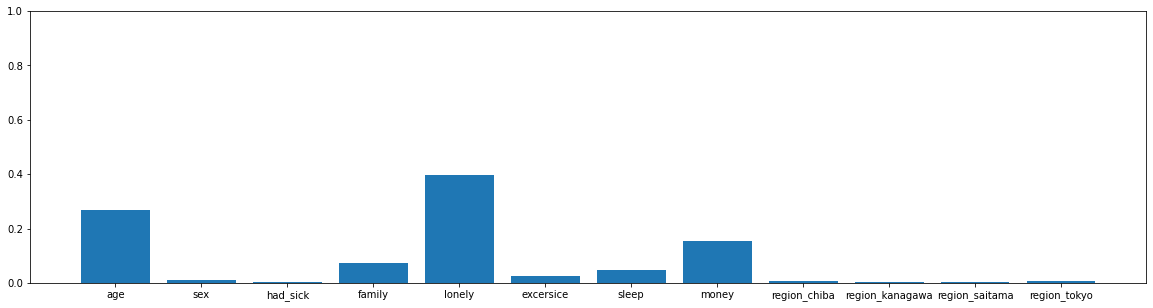

In [59]:
plt.figure(figsize=(20, 5))
plt.ylim([0, 1])
y = feature_importances
x = np.arange(len(y))
plt.bar(x, y, align="center")
plt.xticks(x, columns)
plt.show()

In [60]:
import joblib
joblib.dump(rf, 'model_Classifier.pkl', compress=True)
joblib.dump(regr, 'model_Regression.pkl', compress=True)

['model_Regression.pkl']